### Sharpe Ratio 
1. measure of calculating risk-adjusted return, this ratio is industry standard
2. S=(Rp-Rf)/sigma , sigma is the standard devitaion, risk free return are money invested in saving bonds,or treasury bonds
3. s= mean return/ std,deciation considering Rf to be 0
4. multiply with k ie Daily-> k = sqrt(252) coz 252 business days in a yr, weekly->k=sqrt(52),monethly->k=sqrt(12), so as to just cal annualised sr 

In [1]:
import pandas as pd
import quandl

In [2]:
start=pd.to_datetime('2012-01-01')
end=pd.to_datetime('2017-01-01')


In [7]:
apple=quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)

In [5]:
cisco=quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm=quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn=quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [8]:
apple 

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
...,...
2016-12-23,115.080808
2016-12-27,115.811668
2016-12-28,115.317843


In [10]:
apple.iloc[0]['Adj. Close']

52.848786580038

In [12]:
## cummulative return - normalisimg the stock
for stock_df in (apple,cisco,ibm,amzn):
    stock_df['Normed Return']=stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']
    

In [13]:
apple.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [14]:
apple.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


In [ ]:
### 30% in apple
### 20% in cisco
### 40% in amazon
### 10% in ibm

In [17]:
list(zip((apple,cisco,ibm,amzn),[.3,.2,.4,.1]))

[(            Adj. Close  Normed Return  Allocation
  Date                                             
  2012-01-03   52.848787       1.000000    0.300000
  2012-01-04   53.132802       1.005374    0.301612
  2012-01-05   53.722681       1.016536    0.304961
  2012-01-06   54.284287       1.027162    0.308149
  2012-01-09   54.198183       1.025533    0.307660
  ...                ...            ...         ...
  2016-12-23  115.080808       2.177549    0.653265
  2016-12-27  115.811668       2.191378    0.657413
  2016-12-28  115.317843       2.182034    0.654610
  2016-12-29  115.288214       2.181473    0.654442
  2016-12-30  114.389454       2.164467    0.649340
  
  [1258 rows x 3 columns],
  0.3),
 (            Adj. Close  Normed Return  Allocation
  Date                                             
  2012-01-03   15.617341       1.000000    0.200000
  2012-01-04   15.919125       1.019324    0.203865
  2012-01-05   15.860445       1.015566    0.203113
  2012-01-06   15.801764  

In [16]:
for stock_df, allo in zip((apple,cisco,ibm,amzn),[.3,.2,.4,.1]):
    stock_df['Allocation']=stock_df['Normed Return']*allo

In [18]:
apple.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [19]:
for stock_df in (apple,cisco,ibm,amzn):
    stock_df['Position Values']=stock_df['Allocation']*1000000

In [20]:
apple.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [22]:
all_pos_vals=[apple['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']]
portfolio_value=pd.concat(all_pos_vals,axis=1)

In [26]:
portfolio_value.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [27]:
portfolio_value.columns=['apple pos','cisco pos','ibm pos','amzn pos']

In [28]:
portfolio_value['Total Pos']=portfolio_value.sum(axis=1)

In [29]:
portfolio_value.head()

,apple pos,cisco pos,ibm pos,amzn pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

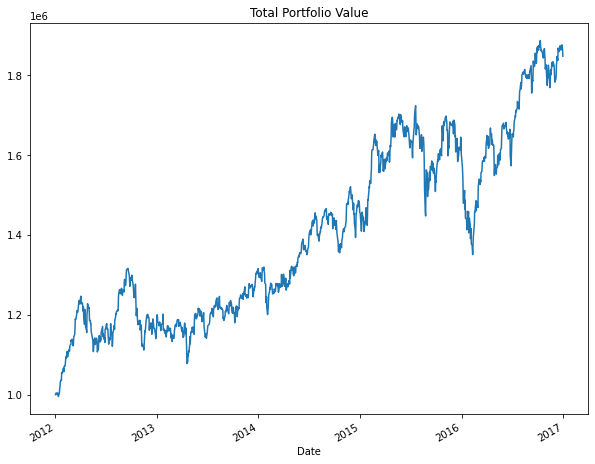

In [31]:
portfolio_value['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

<AxesSubplot:xlabel='Date'>

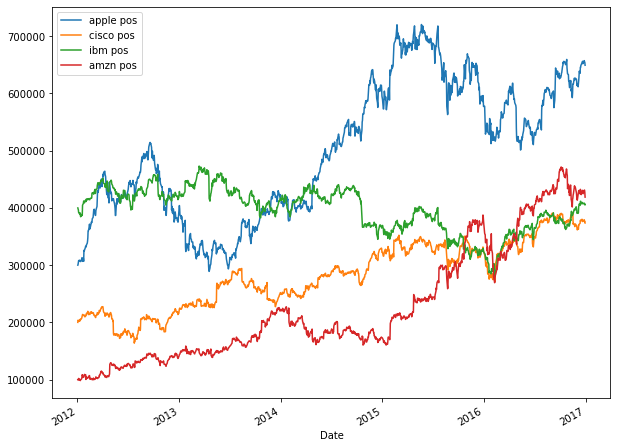

In [33]:
portfolio_value.drop('Total Pos',axis=1).plot(figsize=(10,8))

### Portfolio Status

In [35]:
portfolio_value.head()

,apple pos,cisco pos,ibm pos,amzn pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [36]:
portfolio_value['Daily Return']=portfolio_value['Total Pos'].pct_change(1)

In [38]:
portfolio_value.head()

,apple pos,cisco pos,ibm pos,amzn pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


In [39]:
portfolio_value['Daily Return'].mean()

0.0005442330716215244

In [40]:
portfolio_value['Daily Return'].std()

0.010568287769161718

<AxesSubplot:ylabel='Frequency'>

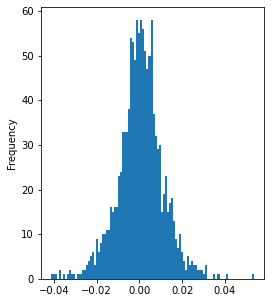

In [41]:
portfolio_value['Daily Return'].plot(kind='hist',bins=100,figsize=(4,5)) 

<AxesSubplot:ylabel='Density'>

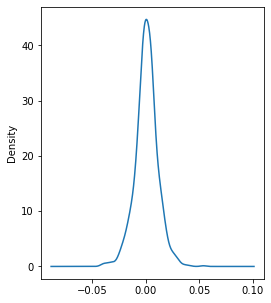

In [42]:
portfolio_value['Daily Return'].plot(kind='kde',figsize=(4,5))

In [43]:
cumulative_return=100*(portfolio_value['Total Pos'][-1]/portfolio_value['Total Pos'][0]-1)

In [44]:
cumulative_return

84.74285181665545

In [45]:
portfolio_value['Total Pos'][-1]

1847428.5181665544

In [47]:
SR = portfolio_value['Daily Return'].mean()/portfolio_value['Daily Return'].std()

In [48]:
SR

0.05149680662648092

In [49]:
ASR=(252**0.5)*SR

In [50]:
ASR

0.8174864618859096

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
apple = pd.read_csv('AAPL_CLOSE', index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE', index_col='Date',parse_dates=True)
ibm=pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE', index_col='Date',parse_dates=True)

In [54]:
stocks=pd.concat([apple,cisco,ibm,amzn],axis=1)
stocks.columns=['apple','cisco','ibm','amzn']

In [55]:
stocks.head()

,apple,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [56]:
stocks.pct_change(1).mean()

apple    0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [57]:
stocks.pct_change(1).corr()

,apple,cisco,ibm,amzn
apple,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [59]:
stocks.pct_change(1).head()

,apple,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [60]:
log_ret=np.log(stocks/stocks.shift(1))
log_ret.head()

,apple,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


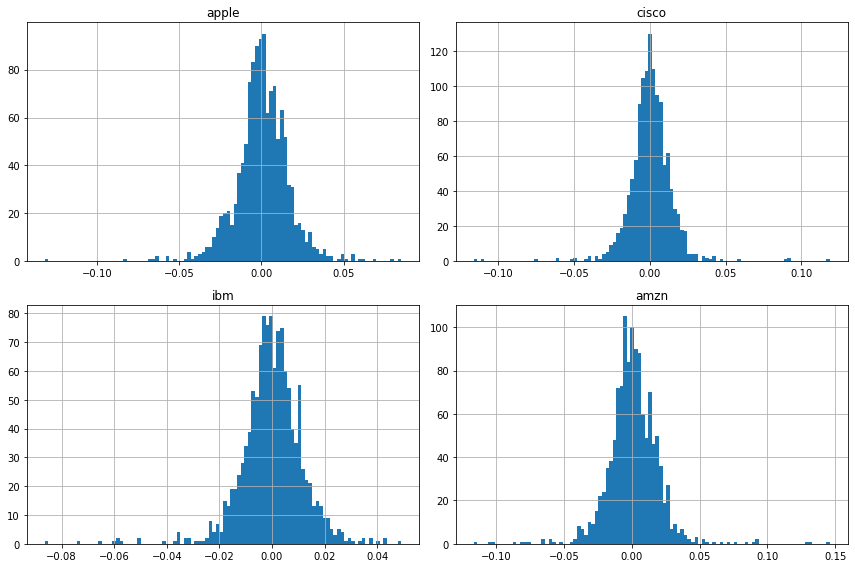

In [61]:
log_ret.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [62]:
log_ret.mean()

apple    0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [64]:
log_ret.cov()

,apple,cisco,ibm,amzn
apple,0.000271,0.000071,0.000057,0.000075
cisco,0.000071,0.000204,0.000072,0.000079
ibm,0.000057,0.000072,0.000140,0.000059
amzn,0.000075,0.000079,0.000059,0.000375


In [65]:
log_ret.cov()*252

,apple,cisco,ibm,amzn
apple,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [66]:
print(stocks.columns)

weights=np.array(np.random.random(4))

print("Random Weights")
print(weights)

Index(['apple', 'cisco', 'ibm', 'amzn'], dtype='object')
Random Weights
[0.00869781 0.05278214 0.11282256 0.48224152]


In [67]:
print(stocks.columns)

weights=np.array(np.random.random(4))

print("Random Weights:")
print(weights)

print('Rebalance')
weights=weights/np.sum(weights)
print(weights)

Index(['apple', 'cisco', 'ibm', 'amzn'], dtype='object')
Random Weights
[0.51494116 0.42919575 0.41925594 0.33502104]
Rebalance
[0.30318944 0.25270386 0.24685145 0.19725524]


In [69]:
## to get same random set of numbers
np.random.seed(101)
print(stocks.columns)

weights=np.array(np.random.random(4))

print("Random Weights:")
print(weights)

print('Rebalance')
weights=weights/np.sum(weights)
print(weights)


Index(['apple', 'cisco', 'ibm', 'amzn'], dtype='object')
Random Weights:
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]


In [71]:
weights=np.array(np.random.random(4)) ## u will keep getting diff set of number here though
weights

array([0.72154386, 0.18993895, 0.55422759, 0.35213195])

In [72]:
np.random.seed(101)
print(stocks.columns)

weights=np.array(np.random.random(4))

print("Random Weights:")
print(weights)

print('Rebalance')
weights=weights/np.sum(weights)
print(weights)

##Expected Returns
print("Expected Portfolio_Return")
exp_ret=np.sum((log_ret.mean()*weights)*252)

Index(['apple', 'cisco', 'ibm', 'amzn'], dtype='object')
Random Weights:
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]
Expected Portfolio_Return


In [73]:
np.sum(log_ret.mean()*weights*252)

0.15599272049632007

In [75]:
np.random.seed(101)
print(stocks.columns)

weights=np.array(np.random.random(4))

print("Random Weights:")
print(weights)

print('Rebalance')
weights=weights/np.sum(weights)
print(weights)

##Expected Returns
print("Expected Portfolio_Return")
exp_ret=np.sum((log_ret.mean()*weights)*252)
print(exp_ret)

##Expected volatility
print("Expected Volatility")
exp_vol=np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
print(exp_vol)

##Sharpe Ratio
print("Sharpe Ratio")
SR=exp_ret/exp_vol
print(SR)

Index(['apple', 'cisco', 'ibm', 'amzn'], dtype='object')
Random Weights:
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]
Expected Portfolio_Return
0.15599272049632007
Expected Volatility
0.18502649565909485
Sharpe Ratio
0.8430831483926035


In [76]:
np.random.seed(101)

num_ports=5000
all_weights=np.zeros((num_ports,len(stocks.columns)))
ret_arr=np.zeros(num_ports)
vol_arr=np.zeros(num_ports)
sharpe_arr=np.zeros(num_ports)

for ind in range(num_ports):
    ##weights
    weights=np.array(np.random.random(4))
    weights=weights/np.sum(weights)
    
    ##save weights
    all_weights[ind,:]=weights
    
    ret_arr[ind]=np.sum((log_ret.mean()*weights)*252)
    
    vol_arr[ind]=np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    
    sharpe_arr[ind]=ret_arr[ind]/vol_arr[ind]
    
    

In [77]:
np.sum(log_ret.mean()*weights*252)

0.17851880289984334

In [78]:
sharpe_arr.max()

1.0303260551271065

In [79]:
sharpe_arr.argmax()

1420

In [80]:
all_weights[1420,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [ ]:
max_sr_ret=ret_arr[1420]
max_sr_vol=vol_arr[1420]

Text(0, 0.5, 'Return')

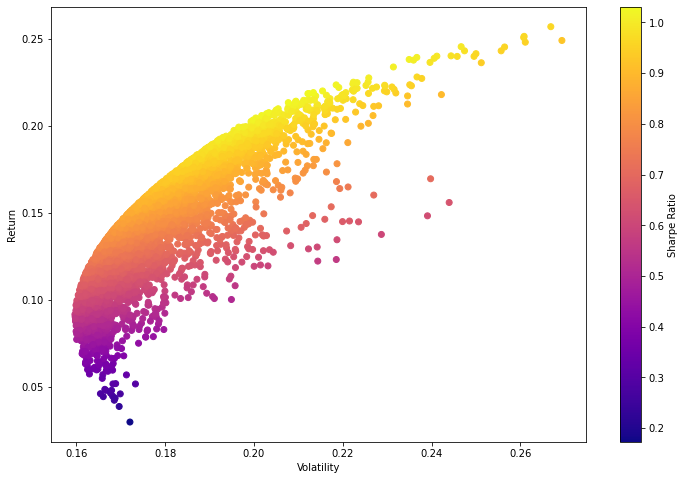

In [81]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [82]:
def get_ret_vol_sr(weights):
    weights=np.array(weights)
    ret=np.sum(log_ret.mean()*weights)*252
    vol=np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sr=ret/vol
    return np.array([ret,vol,sr])

In [83]:
from scipy.optimize import minimize

In [84]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

In [85]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2]* -1 ## coz we want to minimize the neg sharpe ratio


In [86]:
def check_sum(weights):
    return np.sum(weights)-1


In [87]:
cons=({'type':'eq','fun':check_sum})

In [88]:
bounds=((0,1),(0,1),(0,1),(0,1))

In [89]:
init_guess=[0.25,0.25,0.25,0.25]

In [90]:
opt_results=minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [91]:
opt_results

     fun: -1.030716870334616
     jac: array([ 5.64157963e-05,  4.18424606e-05,  3.39921713e-01, -4.45097685e-05])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.26628978, 0.20418983, 0.        , 0.5295204 ])

In [92]:
opt_results.x

array([0.26628978, 0.20418983, 0.        , 0.5295204 ])

In [93]:
get_ret_vol_sr(opt_results.x) ## last same as line 78

array([0.21885915, 0.21233683, 1.03071687])

In [94]:
frontier_y = np.linspace(0,0.3,100)

In [95]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [96]:
frontier_volatility=[]

for possible_return in frontier_y:
    cons=({'type':'eq','fun':check_sum},{'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    
    result=minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])
    

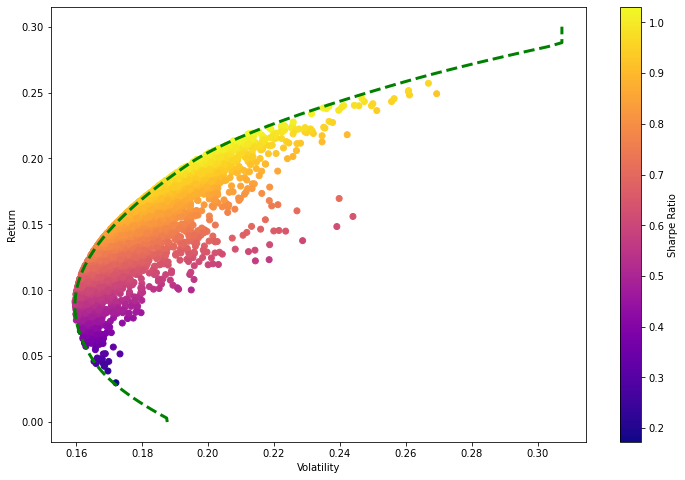

In [97]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

1. types of funds
2. order books
3. latency arbitrage(HFT)
4. short selling

### capital asset pricing model

In [98]:
from scipy import stats

In [99]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension. In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    result : ``LinregressResult`` instance
        The return value is an object with the following attributes:
    
        slope : float
            Slope of the regression line.
        intercept : float
            Intercept of the regression line.
        rvalue : float
            Correlati

In [100]:
import pandas as pd

In [101]:
import pandas_datareader as web

In [104]:
spy_etf=web.DataReader('SPY','google')
spy_etf.info()

NotImplementedError: data_source='google' is not implemented